# Lab 7.04 - Time series analysis

In [1]:
# Package imports
# Package imports for data science and time series analysis in particular
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

### Exercise 4 - Airline ticket data

Consider the airline ticket data in the file airline ticket data.csv  

- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Create and train the model. Predict the values for the next 12 months.
- Create a plot with the airline ticket data, the fitted values and the predicted values for the next 12 months.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

C:\Users\Jamie\AppData\Local\Temp\ipykernel_9280\4084518144.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Tickets
Month,
2018-01-01,605
2018-02-01,647
2018-03-01,636
2018-04-01,612
2018-05-01,714


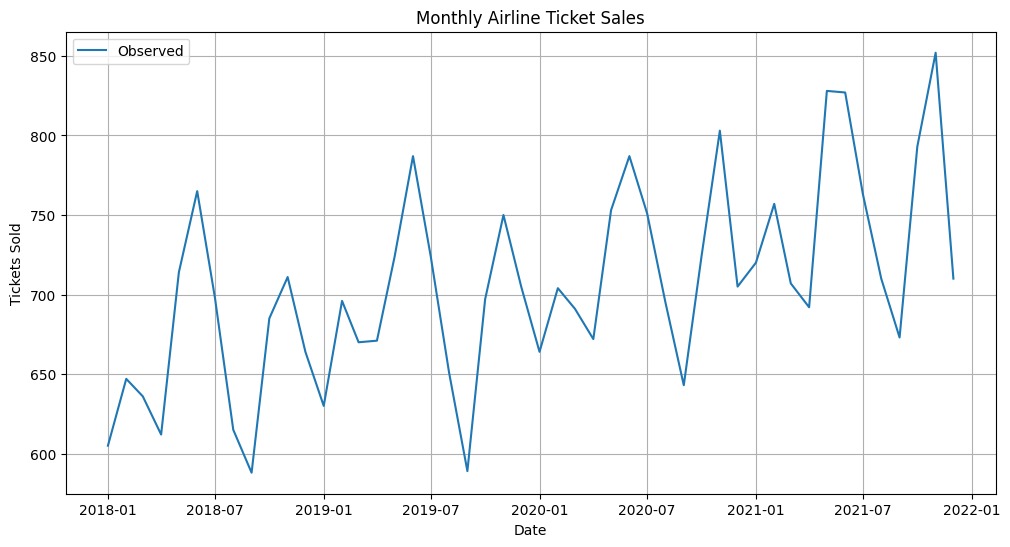

In [3]:
#  Stap 2: Plot de originele tijdreeks
plt.figure(figsize=(12, 6))
plt.plot(data, label='Observed')
plt.title('Monthly Airline Ticket Sales')
plt.xlabel('Date')
plt.ylabel('Tickets Sold')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\Jamie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


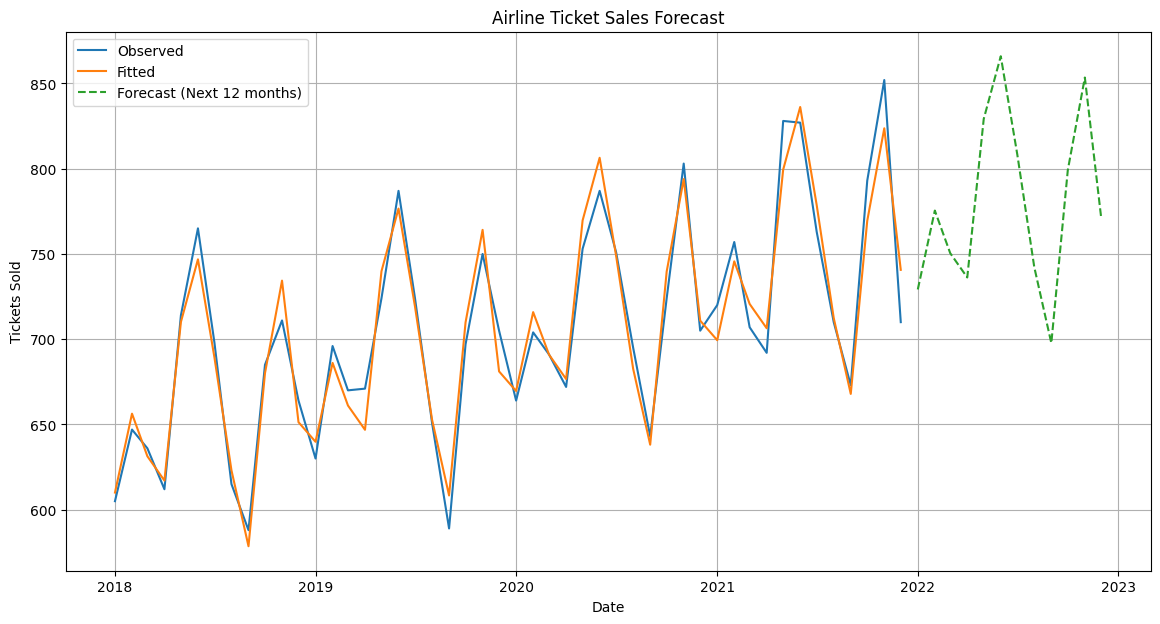

In [3]:
#  Stap 3: Model trainen – Holt-Winters (Triple Exponential Smoothing)
model = ExponentialSmoothing(
    data['Tickets'], 
    trend='add',              # omdat er een stijgende trend is
    seasonal='add',           # omdat seizoensinvloed lineair lijkt
    seasonal_periods=12       # 12 maanden = jaarlijks patroon
).fit()

#  Stap 4: Voorspel de komende 12 maanden
forecast = model.forecast(12)

#  Stap 5: Plot data, fitted values en forecast
plt.figure(figsize=(14, 7))
plt.plot(data, label='Observed') # De echte waarnemingen (werkelijke waarden)
plt.plot(model.fittedvalues, label='Fitted') # De voorspellingen van het model over dezelfde periode als de trainingsdata
plt.plot(forecast, label='Forecast (Next 12 months)', linestyle='--')
plt.title("Airline Ticket Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Tickets Sold")
plt.legend()
plt.grid(True)
plt.show()


## Source
Business Analytics Data Analysis & Decision Making 


---

##  Stap 1: Laad de data in

Gebruik `read_csv()` met `parse_dates` en zet 'Month' als index om de tijdreeksstructuur te creëren.

---

##  Stap 2: Visualiseer de tijdreeks

Plot de gegevens en beantwoord deze vragen:

### Wat zie je?

-  **Trend** – de verkoop stijgt jaar na jaar
-  **Seizoen** – elk jaar zijn er herhalende pieken en dalen

---

##  Stap 3: Kies het juiste model

Omdat je **trend én seizoen** ziet in de grafiek, gebruik je:

### Holt-Winters Model  
(Triple Exponential Smoothing)

- `trend='add'`: stijging is lineair
- `seasonal='add'`: herhaling is ongeveer gelijk elk jaar
- `seasonal_periods=12`: er zijn 12 maanden per seizoen

---

##  Stap 4: Train het model

Gebruik `ExponentialSmoothing()` van `statsmodels`. Train het model met `.fit()`.

---

##  Stap 5: Voorspel de komende 12 maanden

Gebruik `.forecast(12)` om 1 jaar vooruit te voorspellen.

---

##  Stap 6: Maak de grafiek

Plot:
- De originele data
- De voorspelde waarden ("fitted values")
- De toekomstige waarden ("forecast")

---

##  Interpretatie

- Als je voorspelling de golfbeweging van vorige jaren volgt, is het model geschikt.
- Zijn de afwijkingen klein? Dan is het model accuraat.


#  Holt-Winters (Triple Exponential Smoothing) – Uitleg

---

##  Wat is het?

Holt-Winters is een uitbreiding op Simple en Double Exponential Smoothing.  
Het houdt rekening met:

| Component   | Betekenis                             |
|-------------|----------------------------------------|
| Niveau      | Huidige gemiddelde waarde              |
| Trend       | Richting van de verandering (stijgend?)|
| Seizoen     | Herhaalt patroon elk jaar/kwartaal     |

---

## 🔹 Wanneer gebruik je het?

Als je data toont:
-  Een **duidelijke stijging of daling** (trend)
-  Een **jaarlijks of maandelijks herhalend patroon** (seizoen)

---

##  Additief vs. Multiplicatief

| Soort         | Gebruik als...                                       |
|---------------|------------------------------------------------------|
| Additief      | Seizoensverschillen zijn ongeveer **gelijk** elk jaar |
| Multiplicatief | Seizoensverschillen worden **groter naarmate tijd vordert** |

In deze oefening is `additief` voldoende, omdat de verschillen ongeveer constant zijn.

---

##  Seizoensperiode

- `seasonal_periods=12`: omdat de data **maandelijks** is en het patroon **jaarlijks** terugkomt

---

##  Samenvatting

| Kenmerk        | Aanwezig in data? | Oplossing                         |
|----------------|-------------------|-----------------------------------|
| Trend          |  Ja              | Gebruik `trend='add'`             |
| Seizoen        |  Ja              | Gebruik `seasonal='add'`          |
| Regelmaat (maand) | Ja          | Stel `seasonal_periods=12` in     |

